# Graph Visualizer For Algorithms using CSV File

In [1]:
# Importing Modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Patch
from matplotlib.lines import Line2D

In [2]:
plt.rcParams.update({'font.size': 16})

In [3]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/sample_FCFS_SJF_Comparison.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

print(dataset)


          name  #cases  avgTAT  avgWT  nCS
0  mDRRHA-fcfs       8    27.0    5.5   29
1   mDRRHA-sjf       8    20.0    4.5   20
2  mDRRHA-fcfs      10    27.0    5.5   29
3   mDRRHA-sjf      10    20.0    4.5   20
4  mDRRHA-fcfs       7    27.0    5.5   29
5   mDRRHA-sjf       7    20.0    4.5   20
6  mDRRHA-fcfs       7    27.0    5.5   29
7   mDRRHA-sjf       7    20.0    4.5   20
8  mDRRHA-fcfs       7    27.0    5.5   29
9   mDRRHA-sjf       7    20.0    4.5   20


In [8]:
MDRRHA_SJS_FCFS = 0
ALGO_COMPARISONS_ATAT_BAR = 1
ALGO_COMPARISONS_ATAT_LINE = 2
ALGO_COMPARISONS_WT_BAR = 3
ALGO_COMPARISONS_WT_LINE = 4

<Figure size 432x288 with 0 Axes>

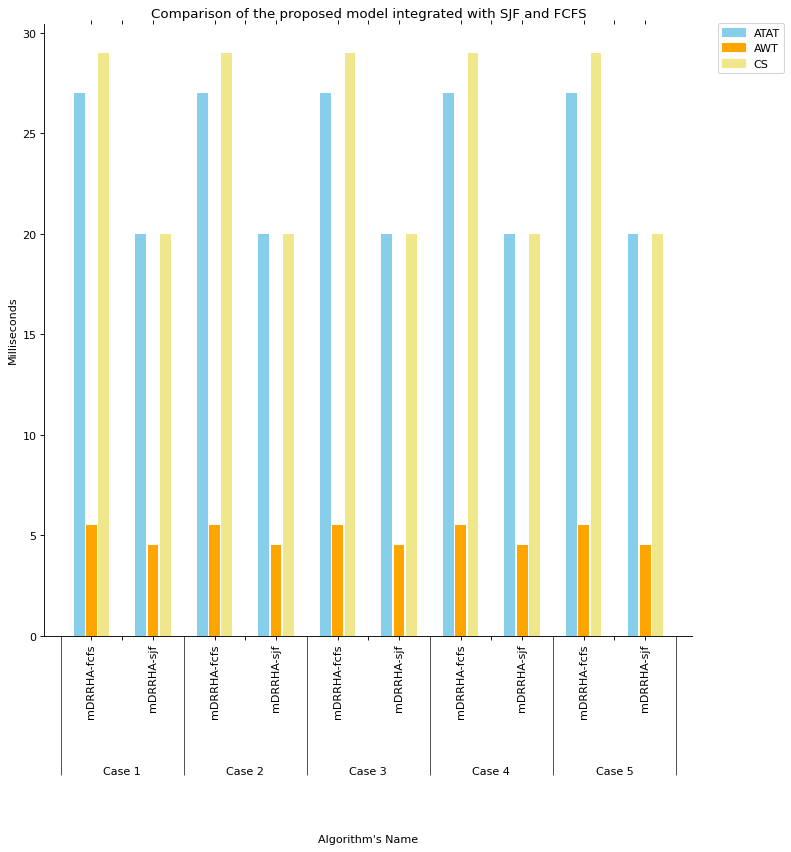

In [4]:
# Comparison of mDRRHA with SJF and FCFS

# Graph Configurations 
plt.figure(MDRRHA_SJS_FCFS)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['name'].to_numpy()
X_labels = []
X_axis = []
X_axis_lines = [0]
X_axis_bars = []

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    X_axis_bars.append(counter)

    counter += 1
    if push_empty:
        push_empty = False
        X_axis_lines.append(counter)
        counter += 1

    if i % 2 == 0:
        X_labels = np.append(X_labels, 'Case ' + str(current_case_index))
        current_case_index += 1
        X_axis.append(counter)
        counter += 1
        push_empty = True

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# vertical alignment of xtick labels
minor_axis_padding_up = -0.2
vertical_align = []
for i in range(0, len(X_labels)):
    valueToPush = 0
    if i % 3 == 1:
        valueToPush = minor_axis_padding_up      

    vertical_align.append(valueToPush)

# Adding Lines to xTicks
line_width = 0.025
line_height = 125

for i, (t, y) in enumerate(zip(ax.get_xticklabels(), vertical_align)):
    if i % 3 == 0 or i % 3 == 2:
        t.set_rotation(90)

    t.set_y(y)


ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

bar_width = 0.35
padding_betweenbars = 0.05

avgTAT_color = 'skyblue'
avgWT_color = 'orange'
nCS_color = 'khaki'

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
current_bar_index = 0
for index, x_axis in enumerate(X_axis_bars):
    ax.bar(
        x_axis - bar_width - padding_betweenbars, 
        dataset['avgTAT'][current_bar_index], 
        bar_width, 
        label = 'ATAT',
        color = avgTAT_color
    )

    ax.bar(
        x_axis, 
        dataset['avgWT'][current_bar_index], 
        bar_width, 
        label = 'AWT',
        color = avgWT_color
    )

    ax.bar(
        x_axis + bar_width + padding_betweenbars, 
        dataset['nCS'][current_bar_index], 
        bar_width, 
        label = 'CS',
        color = nCS_color
    )

    current_bar_index += 1

# Configuring Legend
legend_elements = [
    Patch(facecolor=avgTAT_color, edgecolor=avgTAT_color, label='ATAT'),
    Patch(facecolor=avgWT_color, edgecolor=avgWT_color, label='AWT'),
    Patch(facecolor=nCS_color, edgecolor=nCS_color, label='CS')
]

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.15, 1.01)
)

plt.xlabel('Algorithm\'s Name', labelpad = 50)
plt.ylabel('Milliseconds')
plt.title('Comparison of the proposed model integrated with SJF and FCFS')
# plt.legend()
plt.show()


In [27]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/sample_output.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

dataset = dataset.sort_values(by = ['#cases', 'name'])


In [28]:
print(dataset)

     name  #cases        avgTAT         avgWT         avgRT   nCS
2   DRRHA      10    714.599976    563.400024    264.100006    33
1      RR      10    935.299988    784.099976     32.700001   156
0     SJF      10    536.200012    385.000000    385.000000     9
5   DRRHA      50   4437.560059   4255.200195   2160.120117   139
4      RR      50   6204.680176   6022.319824    232.479996   933
3     SJF      50   3276.320068   3093.959961   3093.959961    49
8   DRRHA     100   9901.629883   9700.190430   4585.370117   300
7      RR     100  13591.790039  13390.349609    485.339996  2055
6     SJF     100   6930.910156   6729.470215   6729.470215    99
11  DRRHA     150  15610.953125  15407.946289   6758.826660   457
10     RR     150  20963.439453  20760.433594    739.580017  3106
9     SJF     150  10625.740234  10422.733398  10422.733398   149
14  DRRHA     200  20853.500000  20649.699219   8923.330078   617
13     RR     200  27874.125000  27670.324219    989.655029  4161
12    SJF 

<Figure size 432x288 with 0 Axes>

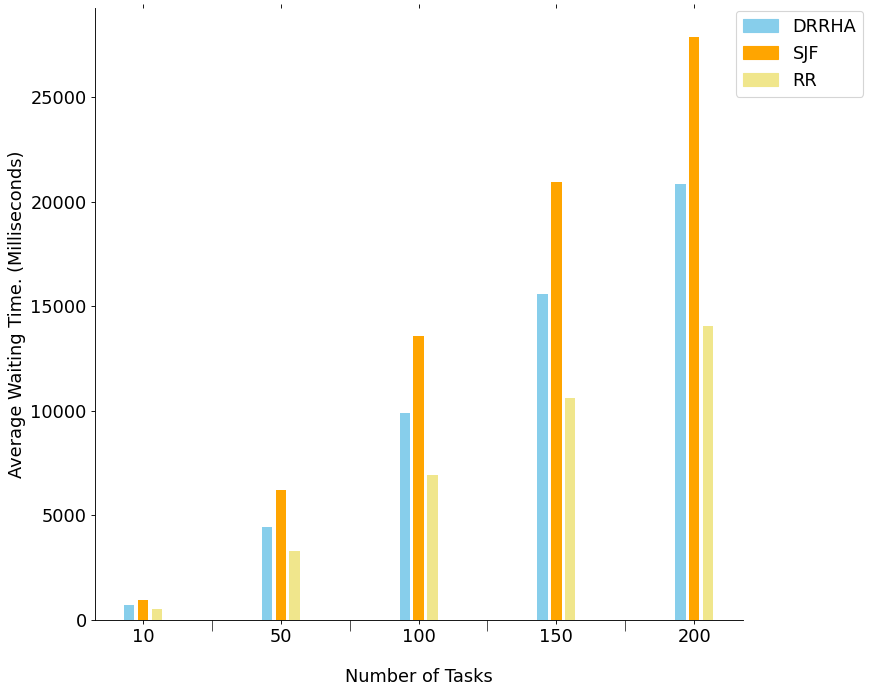

In [32]:
# Comparison of Algos Average Waiting Time and Number of Tasks

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_WT_BAR)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['#cases'].unique()
X_labels = []
X_axis = []
X_axis_lines = [0]

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    counter += 1

    X_axis_lines.append(counter)
    counter += 1

X_labels = X_labels.astype(int)

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# Adding Lines to xTicks
line_width = 0.025
line_height = 10

ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

colors = [
    'skyblue', 'DRRHA',
    'orange', 'SJF',
    'khaki', 'RR'
    # 'red', 'MDRRHA'
]

bar_width = 0.15
paddings = [
    -bar_width - 0.05, 
    0, 
    bar_width + 0.05, 
    2 * bar_width + 0.10
]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
current_value_index = 0
num_algos = len(dataset['name'].unique())
# average_WT_values = dataset['avgRT'].to_numpy()     # To Plot Average Waiting Times
# average_WT_values = dataset['avgWT'].to_numpy()     # To Plot Average Waiting Times
average_WT_values = dataset['avgTAT'].to_numpy()       # To Plot Average Turn around times


for index, x_axis in enumerate(X_axis):
    for i in range(0, num_algos):
        ax.bar(
            x_axis + paddings[i], 
            average_WT_values[current_value_index], 
            bar_width, 
            color = colors[2 * i]
        )

        current_value_index += 1

# Configuring Legend
legend_elements = []

for i in range(0, len(colors), 2):
    legend_elements.append(
        Patch(facecolor=colors[i], edgecolor=colors[i], label=colors[i + 1])
    )

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.20, 1.01)
)

plt.xlabel('Number of Tasks', labelpad = 20)

plt.ylabel('Average Waiting Time. (Milliseconds)')
# plt.ylabel('Average Turnaround Time. (Milliseconds)')

# plt.title('Evalulation of the average Waiting time.')
# plt.title('Evalulation of the average turnaround time.')
plt.show()


In [42]:
# Import Data from CSV file
dataset = pd.read_csv(
    './../data/sample_output.csv', 
    sep=r'\s*,\s*', 
    header=0, 
    encoding='ascii', 
    engine='python'
)

# dataset = dataset.loc[dataset['name'].isin(['SJF', 'DRRHA'])]

sjf_values = dataset.loc[dataset['name'] == 'SJF']
drrha_values = dataset.loc[dataset['name'] == 'DRRHA']
mdrrha_values = dataset.loc[dataset['name'] == 'MDRRHA']
ndrrha_values = dataset.loc[dataset['name'] == 'NDRRHA']

dataset = dataset.sort_values(by = ['#cases', 'name'])

# print(sjf_values)
# print(drrha_values)
# print(mdrrha_values)
print(ndrrha_values)

      name  #cases        avgTAT         avgWT         avgRT  nCS
4   NDRRHA      10    549.400024    398.200012    366.100006   11
9   NDRRHA      50   3608.479980   3426.120117   2545.780029   62
14  NDRRHA     100   7909.029785   7707.589844   5374.000000  128
19  NDRRHA     150  11551.693359  11348.686523   8913.133789  189
24  NDRRHA     200  16015.419922  15811.620117  11948.400391  255
29  NDRRHA     250  19995.212891  19790.712891  15636.188477  299
34  NDRRHA     300  23480.876953  23278.029297  18743.255859  368
39  NDRRHA     350  27617.806641  27414.931641  20137.585938  449
44  NDRRHA     400  32015.869141  31808.554688  24072.794922  495
49  NDRRHA     450  36382.128906  36176.250000  25965.761719  574
54  NDRRHA     500  39326.777344  39120.000000  30105.123047  606


<Figure size 432x288 with 0 Axes>

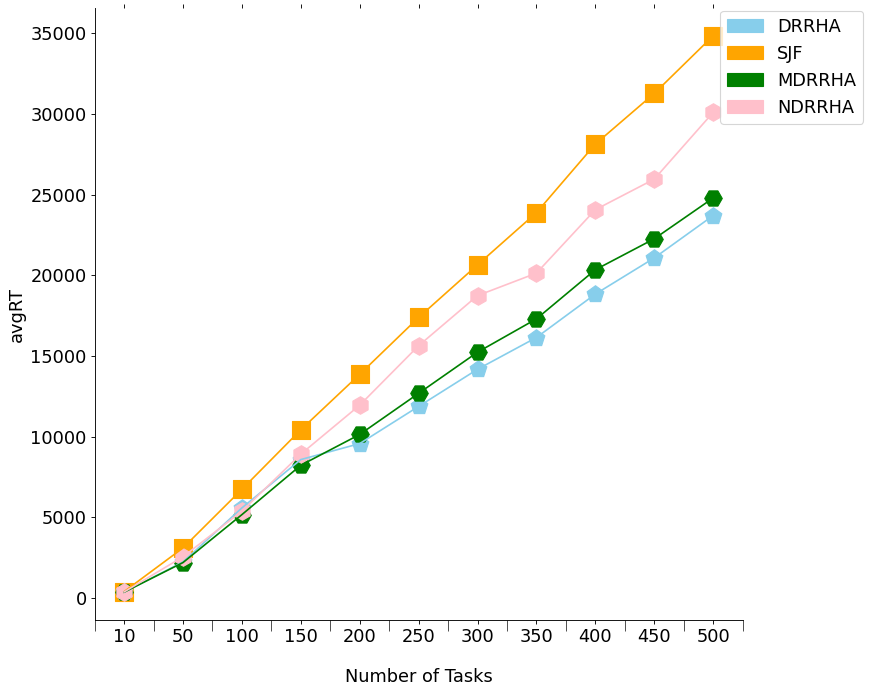

In [53]:
# Line Graph Comparison of DRRHA and STF Average Waiting Time and Number of Tasks

# Graph Configurations 
plt.figure(ALGO_COMPARISONS_WT_LINE)
fig = plt.figure(figsize = (9, 9), dpi = 80)
ax = fig.add_axes([.05, .1, .9, .85])

X = dataset['#cases'].unique()
X_labels = []
X_axis = []
X_axis_lines = [0]

current_case_index = 1
push_empty = False

counter = 1
for i in range(len(X)):
    X_labels = np.append(X_labels, X[i])
    X_axis.append(counter)
    counter += 1

    X_axis_lines.append(counter)
    counter += 1

X_labels = X_labels.astype(int)

ax.set_xticks(X_axis)
ax.set_xticks(X_axis_lines, minor = True)
ax.set_xticklabels(X_labels)

# Adding Lines to xTicks
line_width = 0.025
line_height = 10

ax.tick_params( axis='x', which='minor', direction='out', length=line_height )
ax.tick_params( axis='x', which='major', bottom='off', top='off' )

colors = [
    'skyblue', 'DRRHA',
    'orange', 'SJF',
    'green', 'MDRRHA',
    'pink', 'NDRRHA'
]

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)

# Plotting Bars
marker_size = 250

# plot_metric = 'avgWT'
# plot_metric = 'avgTAT'
plot_metric = 'avgRT'

ax.plot(X_axis, sjf_values[plot_metric].to_numpy(), color = colors[2])
plt.scatter(X_axis, sjf_values[plot_metric].to_numpy(), marker = 's', s = marker_size, color = colors[2])

ax.plot(X_axis, drrha_values[plot_metric].to_numpy(), color = colors[0])
plt.scatter(X_axis, drrha_values[plot_metric].to_numpy(), marker = 'p', s = marker_size, color = colors[0])

ax.plot(X_axis, mdrrha_values[plot_metric].to_numpy(), color = colors[4])
plt.scatter(X_axis, mdrrha_values[plot_metric].to_numpy(), marker = 'H', s = marker_size, color = colors[4])

ax.plot(X_axis, ndrrha_values[plot_metric].to_numpy(), color = colors[6])
plt.scatter(X_axis, ndrrha_values[plot_metric].to_numpy(), marker = 'h', s = marker_size, color = colors[6])

# Configuring Legend
legend_elements = []

for i in range(0, len(colors), 2):
    legend_elements.append(
        Patch(facecolor=colors[i], edgecolor=colors[i], label=colors[i + 1])
    )

ax.legend(
    handles = legend_elements, 
    loc = 'upper right',
    bbox_to_anchor=(1.20, 1.01)
)

plt.xlabel('Number of Tasks', labelpad = 20)
# plt.ylabel('Average Waiting Time. (Milliseconds)')
# plt.ylabel('Average Turnaround Time. (Milliseconds)')
plt.ylabel(plot_metric)
# plt.title('Comparison of the average Waiting time of SJF and DRRHA.')
plt.show()

495


(array([  3.,  20.,  47.,  80., 125., 112.,  70.,  27.,   9.,   2.]),
 array([-121.02  ,  -52.7297,   15.5606,   83.8509,  152.1412,  220.4315,
         288.7218,  357.0121,  425.3024,  493.5927,  561.883 ]),
 <BarContainer object of 10 artists>)

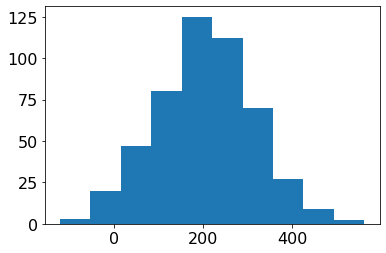

In [31]:
# Graph Configurations 
plt.figure(9)

a_list = list(range(1, 501))

a = [
    309.963, 193.04, 88.3517, 202.005, 318.258, 237.233, 295.609, 290.636, 178.441, 280.099, 221.313, 127.868, 77.2211, 52.5959, -22.9036, 150.741, 218.209, 233.68, 195.441, 13.0714, 181.815, 313.375, 194.197, 306.682, 234.481, 264.495, 207.149, 124.168, 38.8315, 366.026, 113.809, 144.033, -12.2875, 178.829, 176.501, -47.9944, 290.202, 105.876, 262.532, 248.207, 233.537, 91.9651, 144.464, -1.77499, 221.425, 388.893, 247.668, 200.582, 334.951, 258, 154.022, 71.8228, 228.351, 53.4623, 211.464, -91.3318, 145.971, 286.59, 342.072, 247.445, 278.784, 51.5083, 134.387, 137.641, 241.027, 386.463, 209.218, 192.134, 82.2695, 484.402, 212.472, 334.442, 230.606, 70.2125, 176.723, 216.377, 392.089, 561.883, 439.666, 183.92, 166.586, 305.735, 193.725, 87.9848, 13.2749, 60.4649, 296.811, 320.305, 305.613, 142.127, 184.176, 338.519, 109.69, 305.676, 301.292, 324.744, 312.093, 367.518, 354.884, 118.341, 164.566, 361.093, 132.517, 21.2483, 215.768, 210.072, 102.815, 227.653, 381.388, 89.8686, 137.788, 126.421, 124.743, 228.994, 205, 29.3034, 161.529, 138.82, 267.149, 121.647, 296.351, 278.698, 246.388, -37.3484, 185.952, 218.781, 322.528, 267.265, 196.079, 137.541, 400.31, -15.4582, 202.273, 271.099, 172.587, 274.019, 130.919, 202.425, 256.772, 456.379, 129.016, 207.693, 209.404, 188.002, 333.202, 263.715, 243.319, 134.165, -0.116165, 237.189, 255.933, 233.782, 294.309, 264.721, 157.557, 300.277, 191.507, 131.473, 33.7009, 151.648, -12.6435, 65.5129, 145.497, 256.58, 427.863, 410.153, 142.529, 123.257, 338.332, 285.158, 279.81, 195.458, 402.886, 190.271, 326.477, 195.673, 144.655, 222.159, 212.838, 273.412, 85.4196, 22.7912, 137.845, 260.883, 352.27, 109.814, 141.772, 108.203, 208.579, 280.391, 321.588, 186.099, -56.8276, 222.513, 108.849, 167.604, 291.695, 251.626, 196.423, 142.184, 156.14, 442.952, 93.5788, 98.2519, 174.075, 316.167, 56.9167, 116.621, 123.175, 153.262, 324.678, 269.622, 70.5026, 7.32903, 309.834, 332.586, 134.761, 125.081, 184.272, -18.2665, 324.174, 86.5791, 149.227, 450.346, 232.432, 214.314, 351.904, 316.452, 183.66, 77.3152, 105.79, -121.02, 342.129, -46.7906, 164.276, 287.308, 274.75, 203.719, 326.696, 73.5259, 212.818, 180.109, 176.055, 189.232, 245.789, 268.314, 192.039, 310.614, 69.0311, 309.305, 272.517, 169.603, 71.4001, 193.144, 378.208, 159.462, 63.3478, 322.785, 234.86, 232.3, 202.591, 135.859, 179.681, 430.272, 227.844, 372.496, 248.949, 213.413, 383.114, 360.46, 82.9707, -30.3011, 143.456, 172.803, 407.895, 181.735, 302.99, 178.83, 349.406, 178.51, 177.671, 260.815, 340.441, 294.637, 207.162, 115.034, 266.114, 174.698, 226.628, 256.891, 228.416, 195.266, 208.079, 360.027, 259.341, 149.281, 340.397, 216.744, 146.811, 36.0918, 223.406, 279.455, 226.851, 21.9136, 169.635, 261.487, 362.313, 336.078, 356.983, 304.096, 4.76729, 97.7193, 228.104, 89.0473, 265.465, 285.735, 376.723, 220.291, 180.709, 326.195, 262.489, 445.317, 222.903, -13.9846, 152.584, 238.086, 164.546, 189.762, 213.714, 217.959, 177.264, 186.996, 96.2826, 296.062, 318.492, 63.1065, 37.6736, 286.518, 96.8935, 268.87, 206.409, 280.634, 146.271, 162.281, 250.502, 182.847, 248.451, 127.587, 190.073, 216.918, 283.059, 47.2408, 57.606, 182.726, 250.677, 163.54, 39.7952, 348.765, 227.068, 257.881, 510.113, 158.77, 202.277, 350.563, 351.241, 149.107, 267.934, 104.021, 281.62, 79.194, 118.906, -6.45973, 422.236, 296.353, 249.21, 72.2755, -7.3812, 362.001, 309.959, 164.257, 270.038, 187.015, 265.986, 252.064, 320.376, 127.14, 153.51, 191.662, 288.086, 54.0123, 83.1982, 189.425, 218.881, 140.809, 171.312, 362.998, 233.418, 219.647, 252.328, 212.045, 335.985, 382.111, 248.783, 186.918, 292.491, 205.934, 65.1727, 385.075, 76.9387, 112.021, 145.795, 203.638, 81.6922, 90.185, 316.776, 176.905, 279.602, 154.66, 82.0711, 138.335, 295.716, 174.662, 262.476, 257.293, 250.594, 103.125, 207.185, 122.199, 236.723, 132.277, 40.1591, 204.126, 306.478, 164.956, 173.601, 273.124, 195.308, 249.837, 136.235, 376.287, 23.4577, 6.63126, 332.126, 271.558, 168.856, 201.994, 351.932, 44.775, 336.295, 277.632, 229.83, 78.4118, 322.119, 158.235, 202.627, 268.243, 174.888, 290.008, 180.896, -14.1504, 232.914, 125.407, 254.42, 238.813, 261.044, 133.87, 253.996, 370.259, 67.4563, 194.419, 351.79, 277.532, 65.0942, 267.054, 265.012, 286.755, 201.334, 96.9063, 150.186, 242.662, 405.128, 18.9051, 278.659, 255.794, 83.4882, 81.1503, 126.917, 185.669, 230.101, 378.019, 77.6587, 115.979, 438.832, 188.903, 172.038
]


print(len(a))

# plt.scatter(a_list, a)
plt.hist(a)